# Parte 1. Carregando os dados

In [1]:
# Alertas
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)
warnings.filterwarnings("ignore")

# Tratamento dos dados 
import pandas as pd
import numpy as np
import math
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


# Biblioteca para os graficos
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Bibliotecas para analise estatistica
import statsmodels.api as sm
import scipy.stats as ss

# Biblioteca para normalizacao dos dados
from sklearn.preprocessing import MinMaxScaler

# Alertas
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Rodrigo" --iversions

statsmodels.api 0.11.1
platform        1.0.8
matplotlib      3.2.1
numpy           1.18.2
seaborn         0.10.0
pandas          0.25.3
py4j            0.10.7
Rodrigo


In [3]:
# Carregando os dados
data = pd.read_csv("../data/pacientes.csv")
data.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


**Descrição dos Atributos:**

**Demográfico:**

- Sex: masculino ou feminino (variável categórica)
- Age: idade do paciente (variável numérica)
- Education: nenhuma informação adicional é fornecida (variável categórica)

**Comportamental:**

- Current Smoker: se o paciente é ou não fumante atual (variável categórica)
- Cigs Per Day: o número de cigarros que a pessoa fumava em média em um dia (variável numérica)

**Informações sobre histórico médico:**

- BP Meds: se o paciente estava ou não fazendo uso de medicamentos para pressão arterial (variável categórica)
- Prevalent Stroke: se o paciente já teve ou não um AVC (variável categórica)
- Prevalent Hyp: se o paciente era ou não hipertenso (variável categórica)
- Diabetes: se o paciente teve ou não diabetes (variável categórica)

**Informações sobre a condição médica atual:**

- Tot Chol: nível total de colesterol (variável numérica)
- Sys BP: pressão arterial sistólica (variável numérica)
- Dia BP: pressão arterial diastólica  (variável numérica)
- BMI: Índice de Massa Corporal (variável numérica)
- Heart Rate: frequência cardíaca (variável numérica)
- Glucose: nível de glicose (variável numérica)

**Variável de destino:**

- TenYearCHD - Risco de 10 anos de doença cardíaca coronária (CHD - Coronary Heart Disease ) - (binário: "1" significa "Sim", "0" significa "Não")

# Parte 2. Análise Explororatória e Limpeza dos Dados

In [4]:
# Shape
data.shape

(4240, 16)

In [5]:
# Tipos de Dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
sex                4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
# Visualizacao estatistica das variaveis
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
sex,4240.0,0.429245,0.495027,0.00,0.00,0.0,1.00,1.0
age,4240.0,49.580189,8.572942,32.00,42.00,49.0,56.00,70.0
education,4135.0,1.979444,1.019791,1.00,1.00,2.0,3.00,4.0
currentSmoker,4240.0,0.494104,0.500024,0.00,0.00,0.0,1.00,1.0
cigsPerDay,4211.0,9.005937,11.922462,0.00,0.00,0.0,20.00,70.0
BPMeds,4187.0,0.029615,0.169544,0.00,0.00,0.0,0.00,1.0
prevalentStroke,4240.0,0.005896,0.076569,0.00,0.00,0.0,0.00,1.0
prevalentHyp,4240.0,0.310613,0.462799,0.00,0.00,0.0,1.00,1.0
diabetes,4240.0,0.025708,0.158280,0.00,0.00,0.0,0.00,1.0
totChol,4190.0,236.699523,44.591284,107.00,206.00,234.0,263.00,696.0


**Observações:**
---
    - O dataset contém 4240 observações e 16 caracteristicas (features), 
    - TenYearCHD é a variável target
    - Existem features que estão como numéricas mas são categóricas:
        - sex, education, currentSmoker, BPMeds, prevalentStroke, prevalentHyp, diabetes

In [7]:
# Funcao para verificar valores missing no dataset
def check_missing(df, display = 10):
    temp_df = df.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(),'% Missing' :df_nan})
    if missing_data['Missing n'].sum() == 0:
        return print('Ótimo! Não há valores ausentes neste dataset.')
    else:
        return missing_data.sort_values('% Missing', ascending = False).head(display)

# Executando a funcao    
check_missing(data)  

,Missing n,% Missing
glucose,388,9.150943
education,105,2.476415
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585
sex,0,0.000000
age,0,0.000000
currentSmoker,0,0.000000


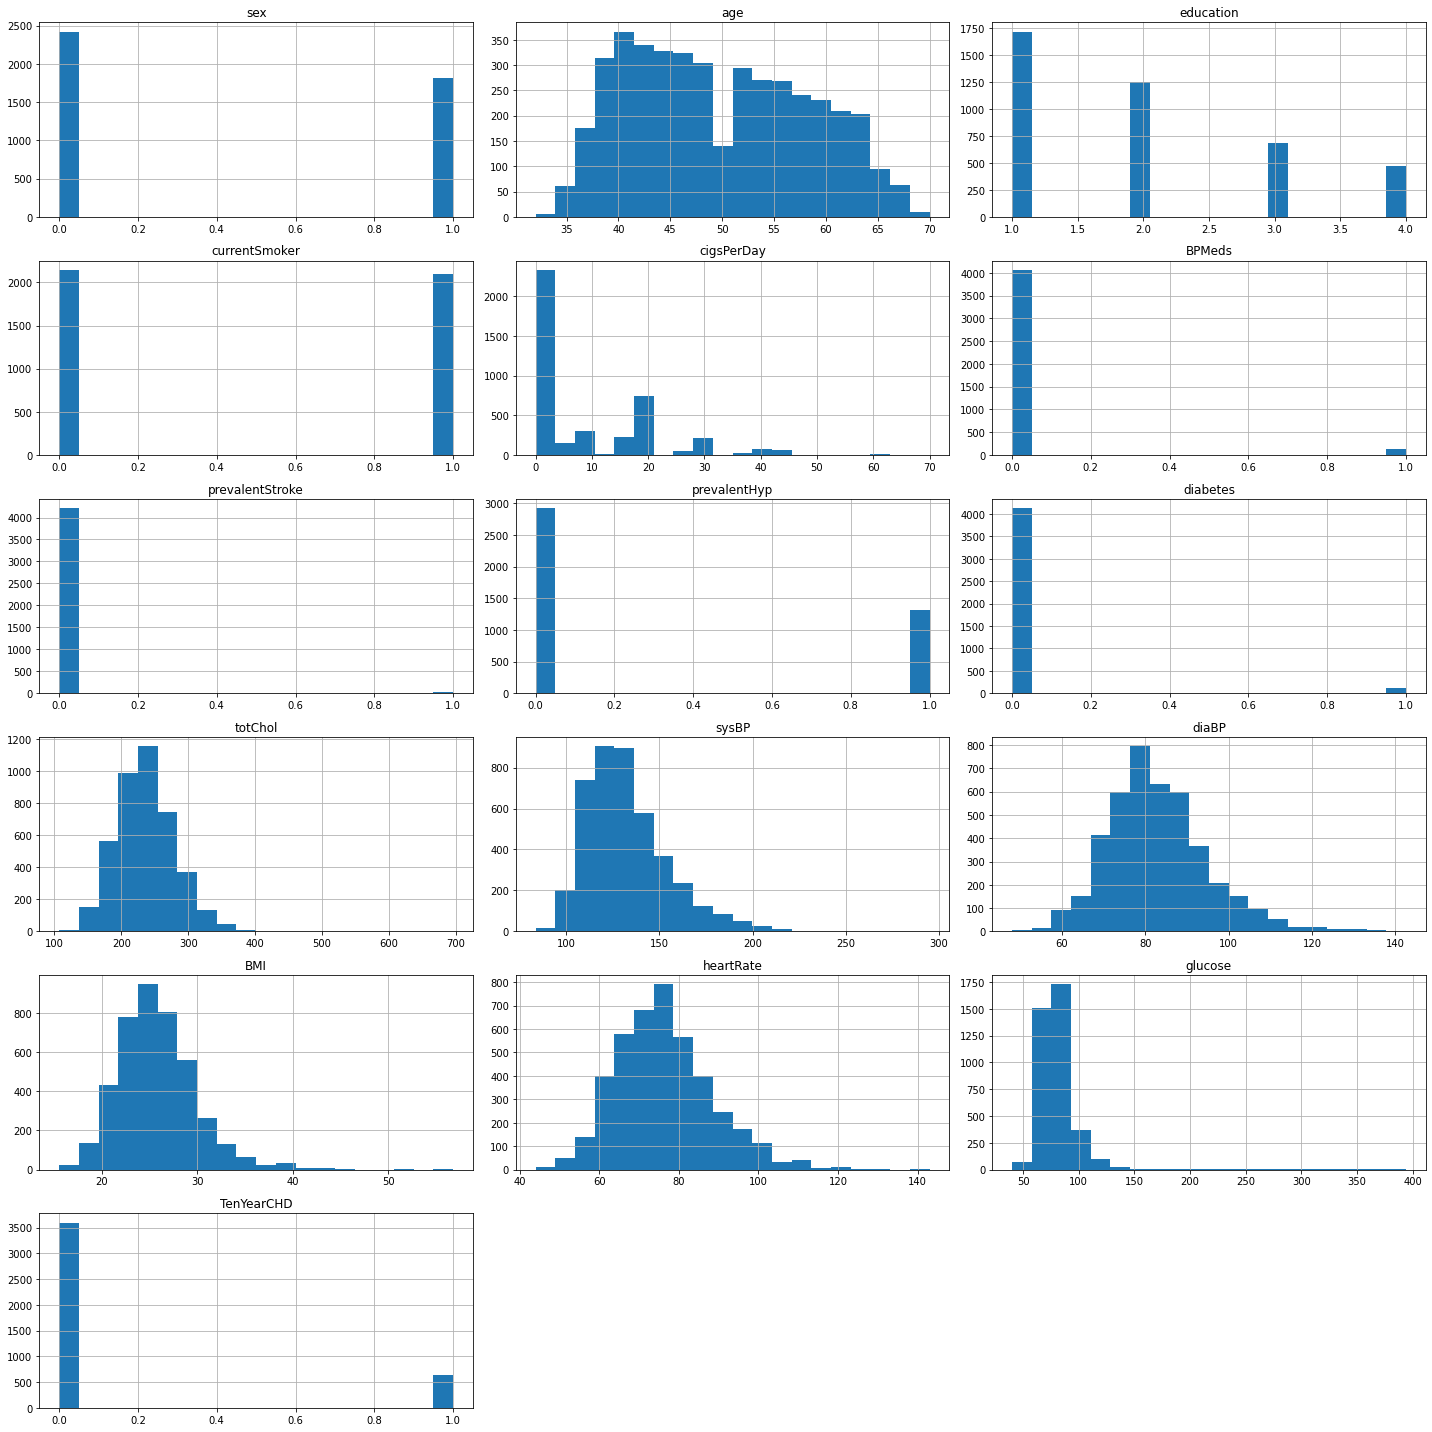

In [8]:
# Função para visualizar a distribuição de cada variável
def histograma(df, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        df[feature].hist(bins = 20, ax = ax)
        ax.set_title(feature)
        
    fig.tight_layout()  
    plt.show()
    
# Executa a função
histograma(data, data.columns, 6, 3)    

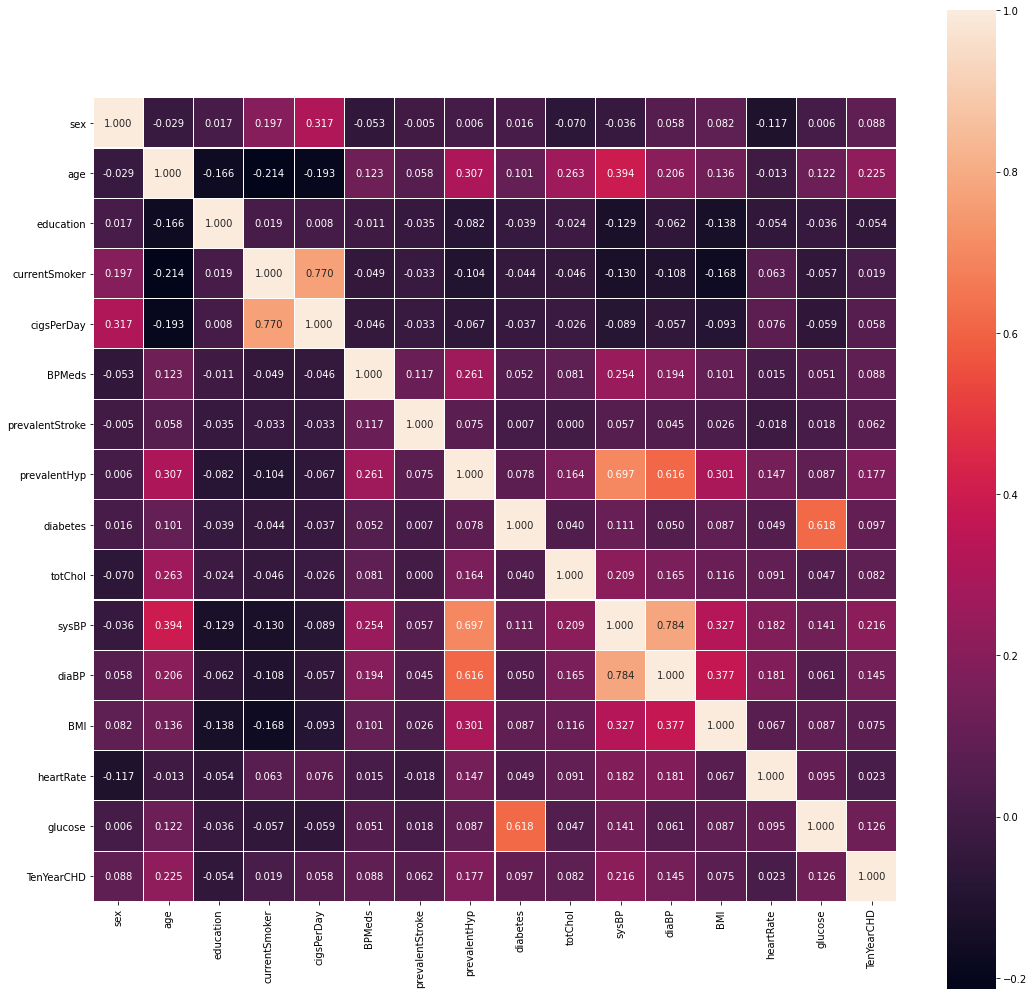

In [9]:
# Verificando a Correlação das Features Numericas
cor_mat = data.corr(method = 'pearson')

# Heatmap plot
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor_mat,linewidths=.1,fmt= '.3f',ax=ax, square=True, cbar=True, annot=True)

In [10]:
# Convertendo as variáveis categóricas para o tipo categórico em Python

# Criando uma cópia do dataset original
tmp = data.copy()

tmp['sex']             = data['sex'].astype('category')
tmp['education']       = data['education'].astype('category')
tmp['currentSmoker']   = data['currentSmoker'].astype('category')
tmp['BPMeds']          = data['BPMeds'].astype('category')
tmp['prevalentStroke'] = data['prevalentStroke'].astype('category')
tmp['prevalentHyp']    = data['prevalentHyp'].astype('category')
tmp['diabetes']        = data['diabetes'].astype('category')
tmp['TenYearCHD']      = data['TenYearCHD'].astype('category')

In [11]:
# Função para calcular a associação entre variáveis categóricas
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# Coleta as variáveis categóricas do dataset
cat_feats = []
for column in tmp:
    if is_string_dtype(tmp[column]):
        cat_feats.append(column)

# Realiza a associacao entre a variavel categorica e a target
print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')
for var in cat_feats:
    print(var + ': ', cramers_v(tmp[var], tmp['TenYearCHD']))
    
del tmp


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


sex:  0.08636468260745578
education:  0.08377914029765006
currentSmoker:  0.010827603872472868
BPMeds:  0.08415533171289226
prevalentStroke:  0.055449485612062324
prevalentHyp:  0.17609969085890384
diabetes:  0.09403299617430384
TenYearCHD:  0.9990843429961895


**Observações:**
---
    - O dataset contém 7 features com valores missing
    - A quantidade maior está na feature glucose, com 388 registros
    - Quase todas as features categoricas tem uma correlação muito fraca (< 0.1) com a target

## Tratamento de Valores Ausentes

In [12]:
# Removendo a coluna education
# Alem de ter uma correlação muito fraca com a feature target, tem muitos valores missing
data = data.drop(['education'], axis = 1)

In [13]:
# Removendo todas as linhas com valores NA
data = data.dropna()
check_missing(data) 

Ótimo! Não há valores ausentes neste dataset.


## Tratamento de Valores Outliers

<Figure size 2160x2160 with 0 Axes>

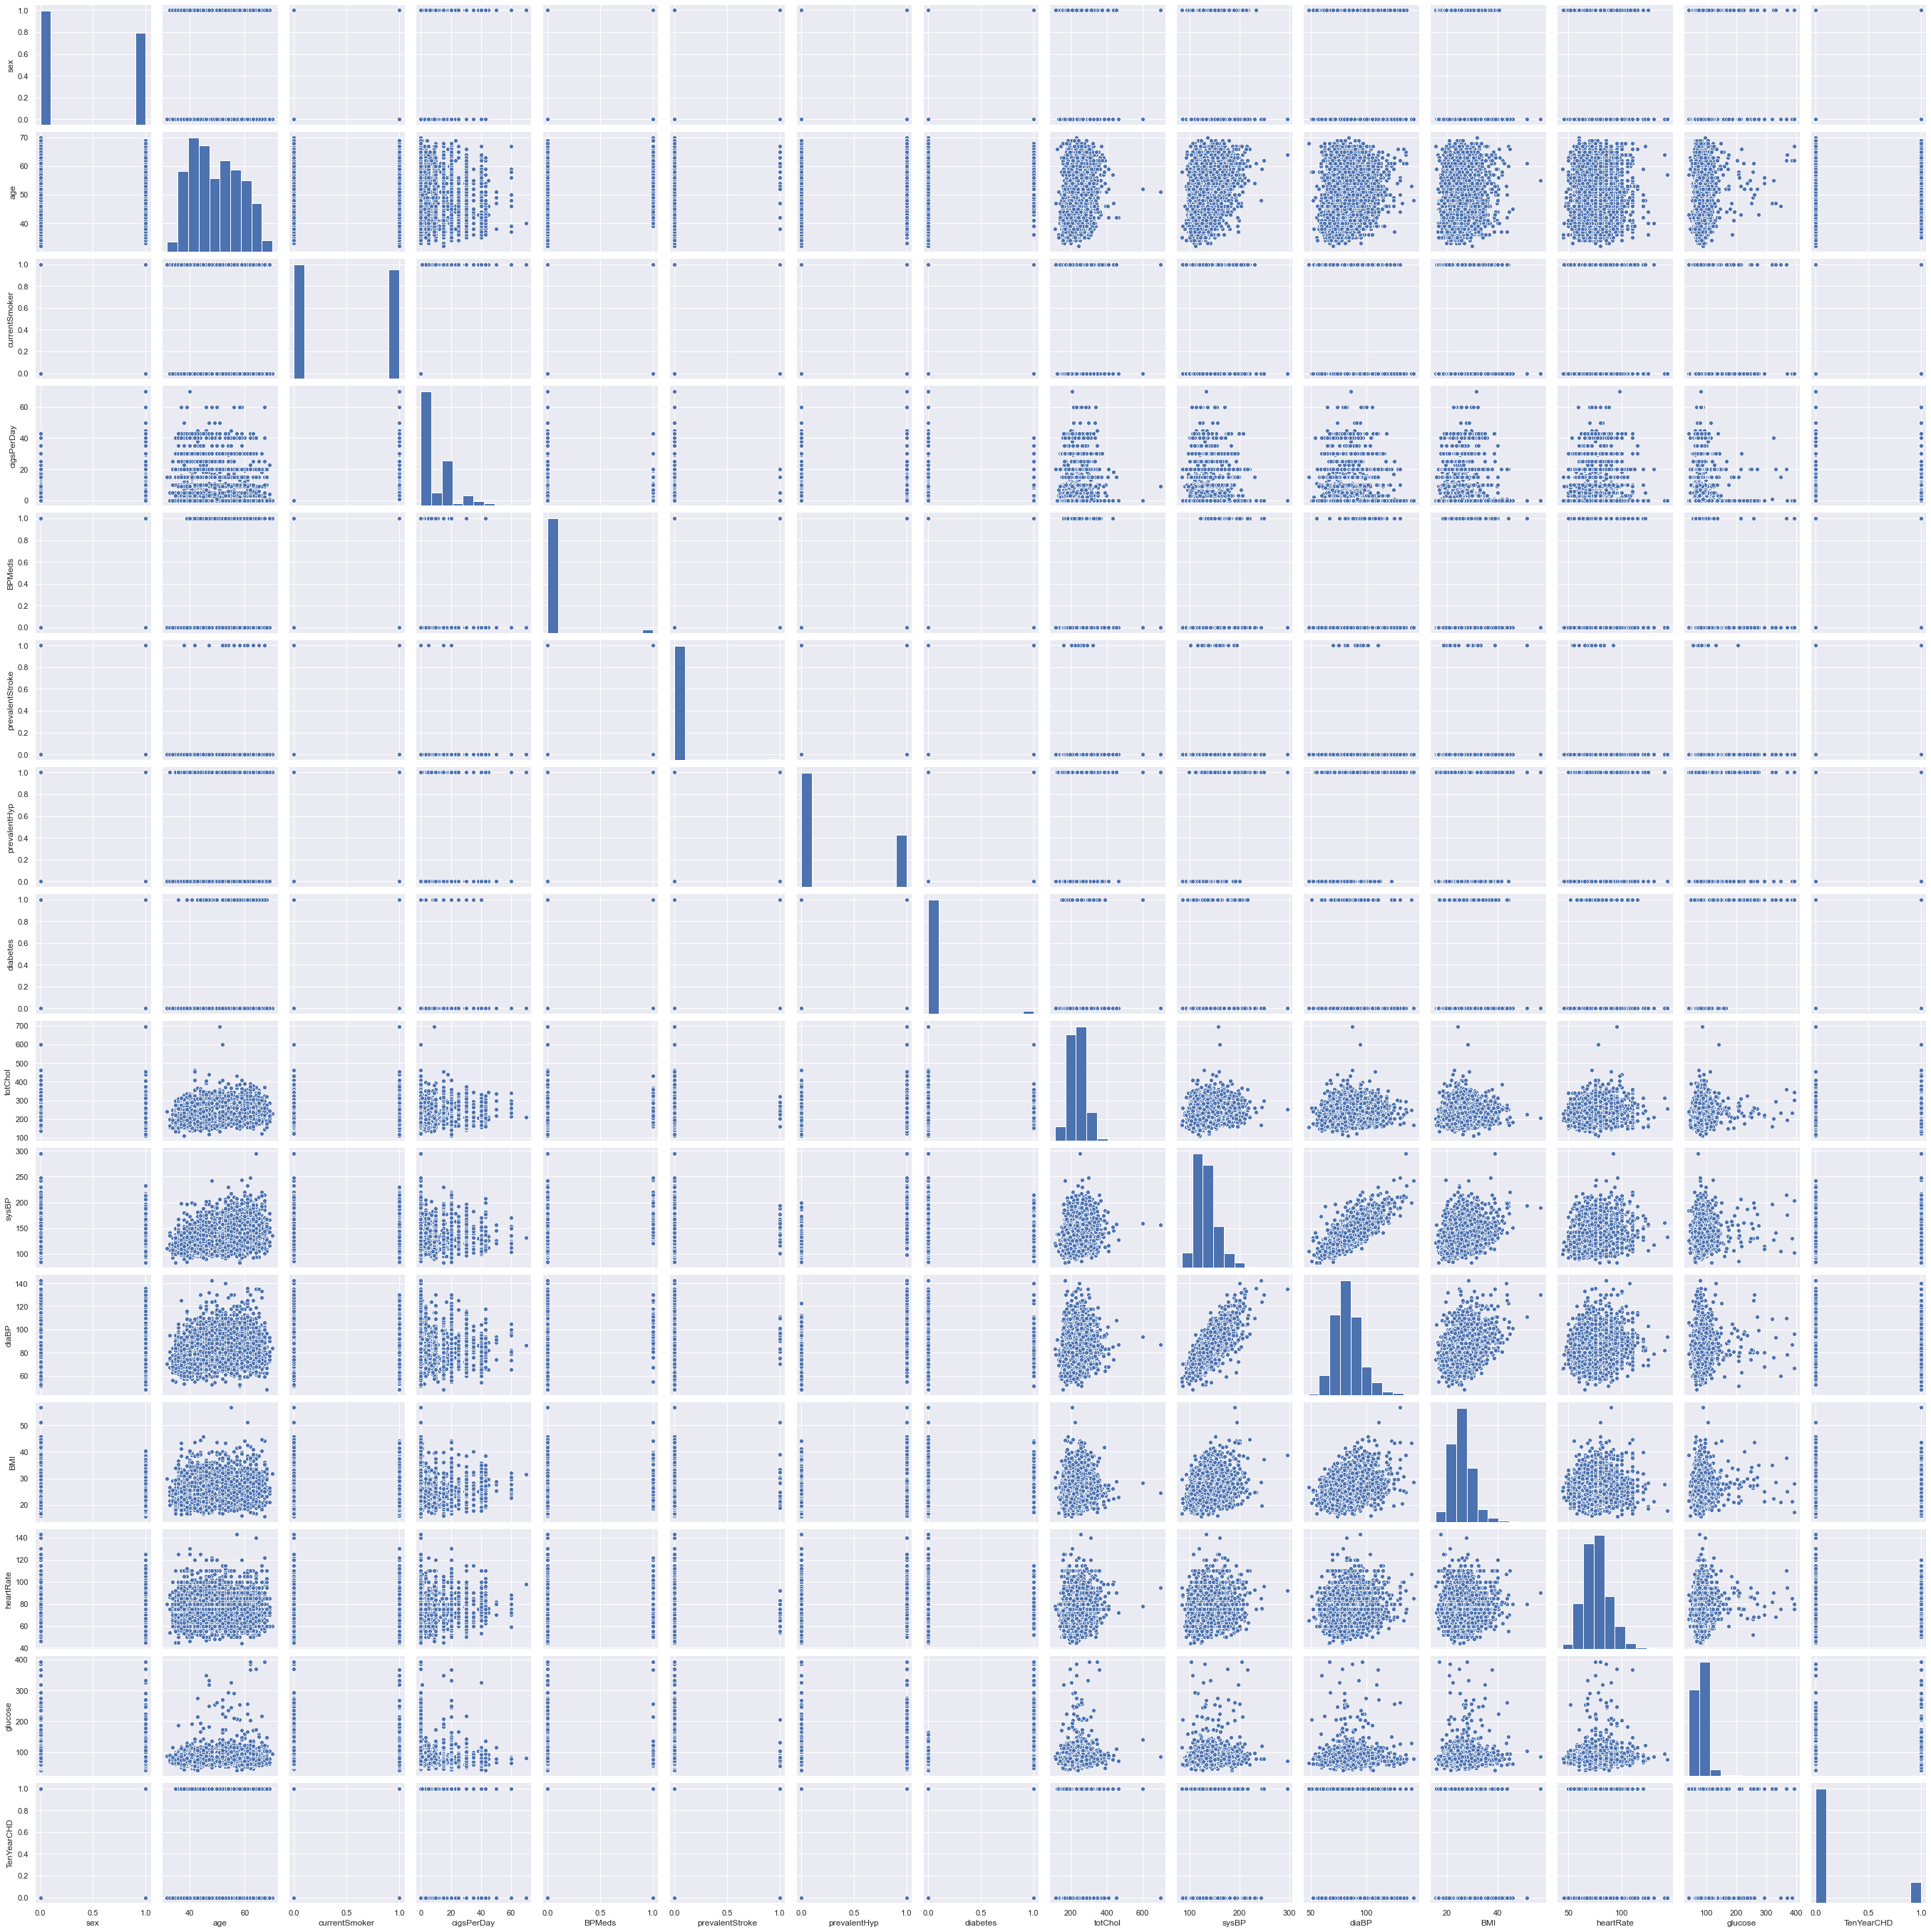

In [14]:
# Verificando os outliers com o PairPlot

sns.set(rc={'figure.figsize':(30, 30)})
plt.figure() 
sns.pairplot(data)
plt.savefig('pairplot_features.png')
plt.show()

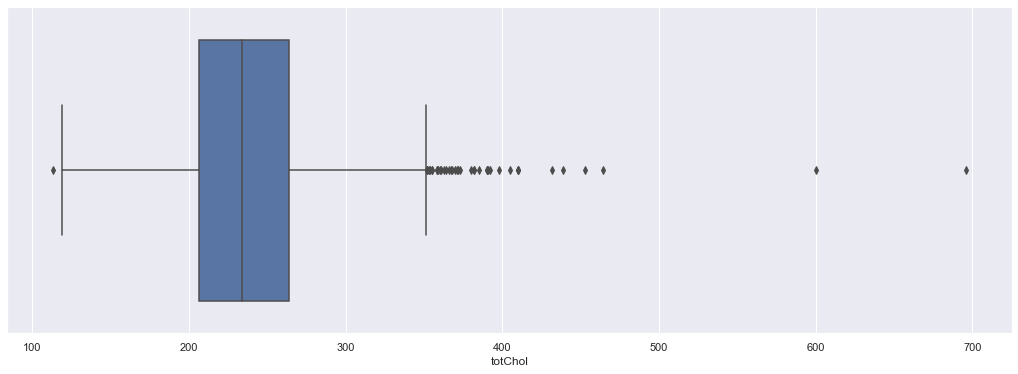

In [15]:
# Visualizando os outliers da variável totChol
sns.set(rc={'figure.figsize':(18, 6)})
sns.boxplot(data.totChol)

In [16]:
# Obs: Nível total de colesterol acima de 240 já é ruim
outliers_totChol = data[(data['totChol'] > 500)] 
outliers_totChol

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
3160,1,51,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


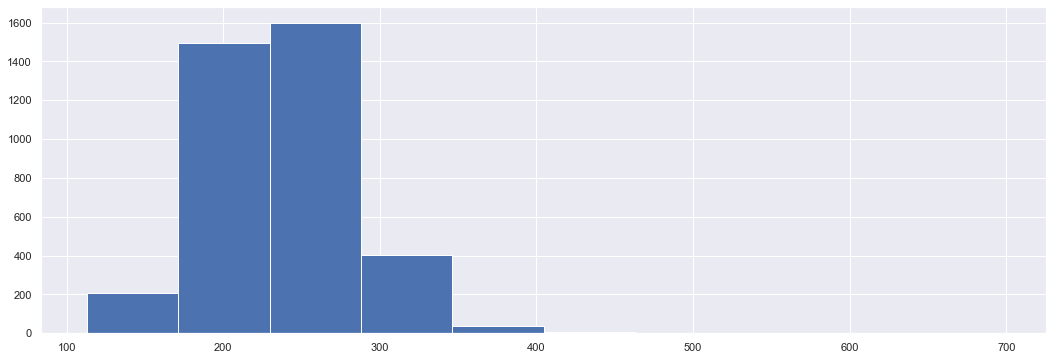

In [17]:
# Histograma da variável totChol antes da limpeza
data.totChol.hist()

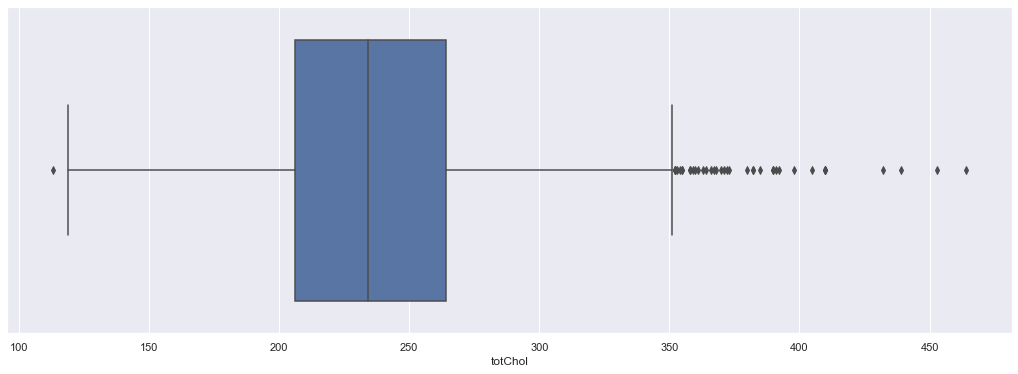

In [18]:
# Vamos remover os outliers
data = data.drop(data[data.totChol > 500].index)
sns.boxplot(data.totChol)

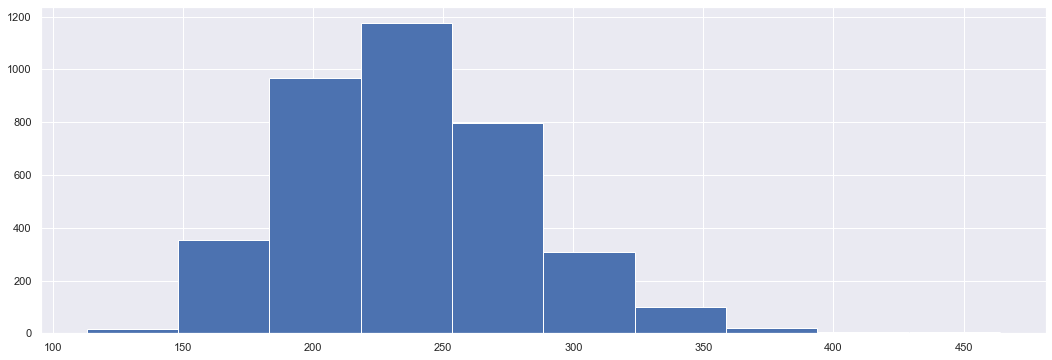

In [19]:
# Histograma da variável totChol depois da limpeza
data.totChol.hist()

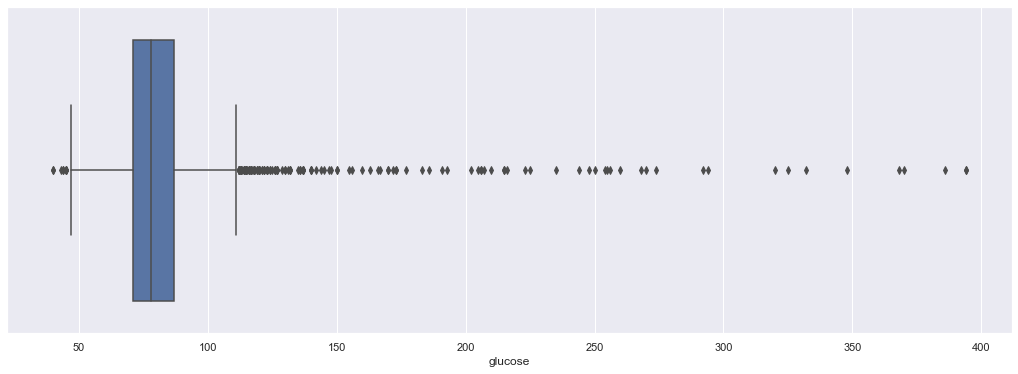

In [20]:
# Visualizando os outliers da variável glucose
sns.boxplot(data.glucose)

In [21]:
# Obs: Valores de nível de glicose acima de 100 mg/dl, em jejum, já podem ser prejudiciais. 
# A relação tempo e dano é muito individual. 
outliers_glucose = data[(data['glucose'] > 300)] 
outliers_glucose

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1363,1,55,1,40.0,0.0,0,0,1,205.0,127.0,76.0,22.24,90.0,325.0,1
2406,0,62,0,0.0,0.0,0,0,1,233.0,130.0,87.0,21.34,85.0,386.0,0
2801,0,47,1,1.0,0.0,0,1,1,160.0,197.0,109.0,34.91,82.0,320.0,1
2893,1,62,0,0.0,0.0,0,0,1,346.0,102.5,66.5,17.17,80.0,394.0,1
2909,0,67,0,0.0,1.0,0,1,1,303.0,204.0,96.0,27.86,75.0,394.0,1
3817,1,47,1,20.0,0.0,0,1,1,296.0,141.0,93.0,28.50,68.0,332.0,1
3844,0,62,1,20.0,1.0,0,1,1,358.0,215.0,110.0,37.62,110.0,368.0,1
3849,0,46,1,15.0,0.0,0,0,1,233.0,106.0,60.0,20.84,75.0,348.0,0
3971,1,64,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0,0


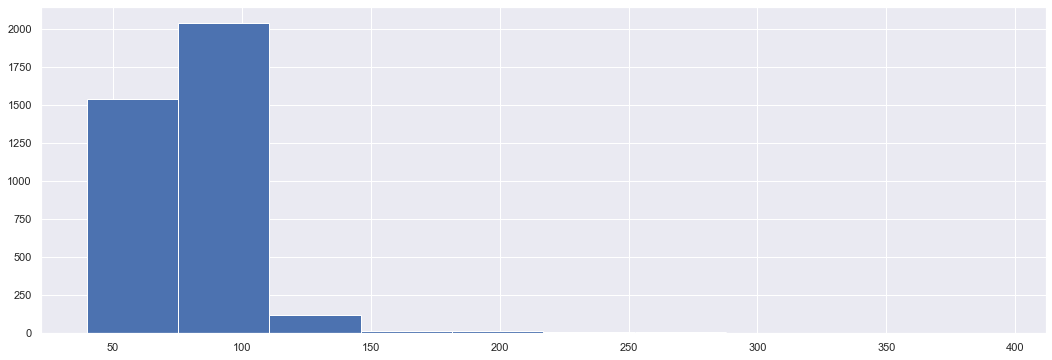

In [22]:
# Histograma da variável glucose antes da limpeza
data.glucose.hist()

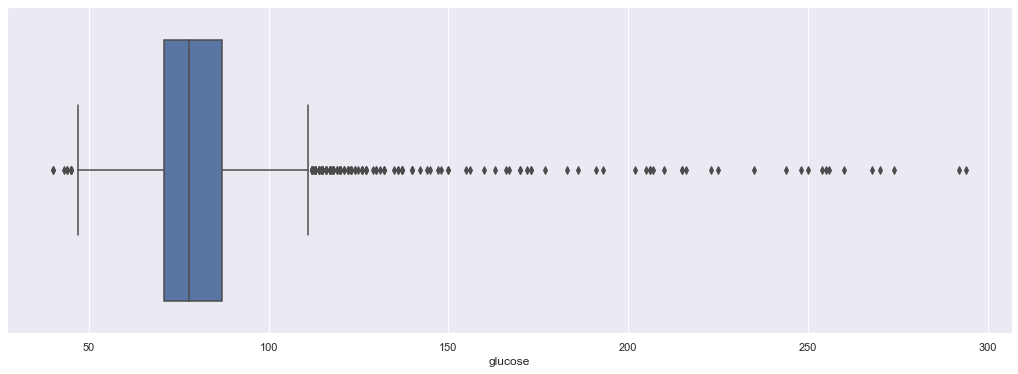

In [23]:
# Vamos remover os outliers
data = data.drop(data[data.glucose > 300].index)
sns.boxplot(data.glucose)

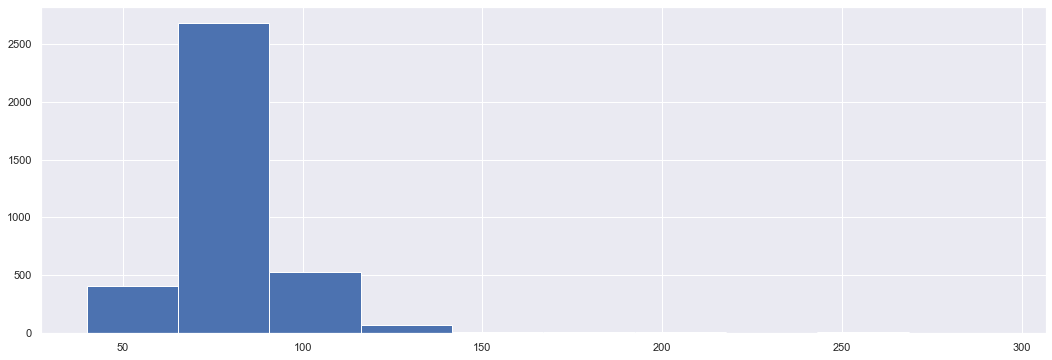

In [24]:
# Histograma da variável glucose depois da limpeza
data.glucose.hist()

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sex,3740.0,0.445187,0.497053,0.00,0.00,0.00,1.00,1.0
age,3740.0,49.554813,8.566586,32.00,42.00,49.00,56.00,70.0
currentSmoker,3740.0,0.488235,0.499928,0.00,0.00,0.00,1.00,1.0
cigsPerDay,3740.0,9.006952,11.923486,0.00,0.00,0.00,20.00,70.0
BPMeds,3740.0,0.029947,0.170463,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3740.0,0.005615,0.074732,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3740.0,0.310963,0.462949,0.00,0.00,0.00,1.00,1.0
diabetes,3740.0,0.024599,0.154920,0.00,0.00,0.00,0.00,1.0
totChol,3740.0,236.655615,43.506528,113.00,206.00,234.00,263.25,464.0
sysBP,3740.0,132.299198,21.950778,83.50,117.00,128.00,143.50,295.0


# Parte 3. Pré-Processamento dos Dados

,TenYearCHD,%
0,3175,84.893048
1,565,15.106952


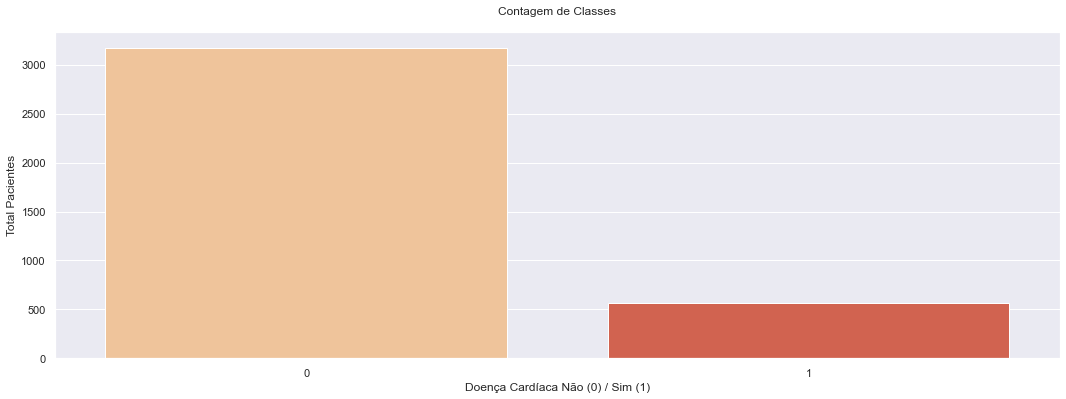

In [26]:
# Existe um problema de desbalanceamento de classes, ou seja, volume maior de um dos tipos de classe. 
# Podemos ver abaixo que existe uma clara desproporção
# entre as classes 0  e 1

# Visualizando a distribuição das classes (variavel TARGET)
sns.countplot(data['TenYearCHD'], palette = "OrRd")
plt.title('Contagem de Classes\n')
plt.xlabel('Doença Cardíaca Não (0) / Sim (1)')
plt.ylabel('Total Pacientes')

# Visualizando um df com quantidade e percentual da variavel TARGET
df = pd.DataFrame(data['TenYearCHD'].value_counts())
df['%'] = 100*df['TenYearCHD']/data.shape[0]
df

Podemos ver que a proporção é de 5,62: 1, que não está bem equilibrada. Um dos principais problemas ao lidar com conjuntos de dados desequilibrados refere-se às métricas usadas para avaliar um modelo. O uso de métricas mais simples, como precision_score, pode ser enganoso. Em um conjunto de dados com classes altamente desequilibradas, se o classificador sempre "predizer" a classe mais comum sem realizar nenhuma análise dos recursos, ele ainda terá uma alta taxa de precisão, obviamente ilusória.

- Reduzir a classe majoritária - Undersampling
- Aumentar a classe minoritária - Oversampling

### SMOTE (Synthetic Minority Oversampling Technique)

SMOTE é um tipo de Dataset Augmentation.

Um problema com a classe desequilibrada é que existem poucos exemplos da classe minoritária para um modelo aprender efetivamente o limite da decisão.

Uma maneira de resolver esse problema é exagerar os exemplos na classe minoritária. Isso pode ser conseguido simplesmente duplicando exemplos da classe minoritária no conjunto de dados de treinamento antes de ajustar um modelo. Isso pode equilibrar a distribuição de classe, mas não fornece nenhuma informação adicional ao modelo.

Uma melhoria na duplicação de exemplos da classe minoritária é sintetizar novos exemplos da classe minoritária. Este é um tipo de aumento de dados para dados tabulares e pode ser muito eficaz.

Talvez a abordagem mais amplamente usada para sintetizar novos exemplos seja chamada Synthetic Minority Oversampling Technique, ou SMOTE, resumidamente. Essa técnica foi descrita por Nitesh Chawla, et al. em seu trabalho de 2002, nomeado para a técnica intitulada "SMOTE: Técnica de sobre-amostragem de minorias sintéticas".

https://arxiv.org/abs/1106.1813

O SMOTE funciona selecionando exemplos que estão próximos no espaço de recurso, desenhando uma linha entre os exemplos no espaço de recurso e desenhando uma nova amostra em um ponto ao longo dessa linha.

Especificamente, um exemplo aleatório da classe minoritária é escolhido primeiro. Em seguida, k dos vizinhos mais próximos desse exemplo é encontrado (normalmente k = 5). Um vizinho selecionado aleatoriamente é escolhido e um exemplo sintético é criado em um ponto selecionado aleatoriamente entre os dois exemplos no espaço de recurso.

O SMOTE primeiro seleciona uma instância de classe minoritária A aleatoriamente e encontra seus k vizinhos de classe minoritária mais próximos. A instância sintética é criada escolhendo um dos k vizinhos mais próximos B aleatoriamente e conectando A e B para formar um segmento de linha no espaço de recursos. As instâncias sintéticas são geradas como uma combinação convexa das duas instâncias escolhidas A e B.

In [28]:
# Importa a função
import imblearn as im
from imblearn.over_sampling import SMOTE

# Seed para reproduzir o mesmo resultado
seed = 0

# Separa X e y
X = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD'] 

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state = seed)

# Aplica o balanceador
X_res, y_res = smote_bal.fit_resample(X, y)

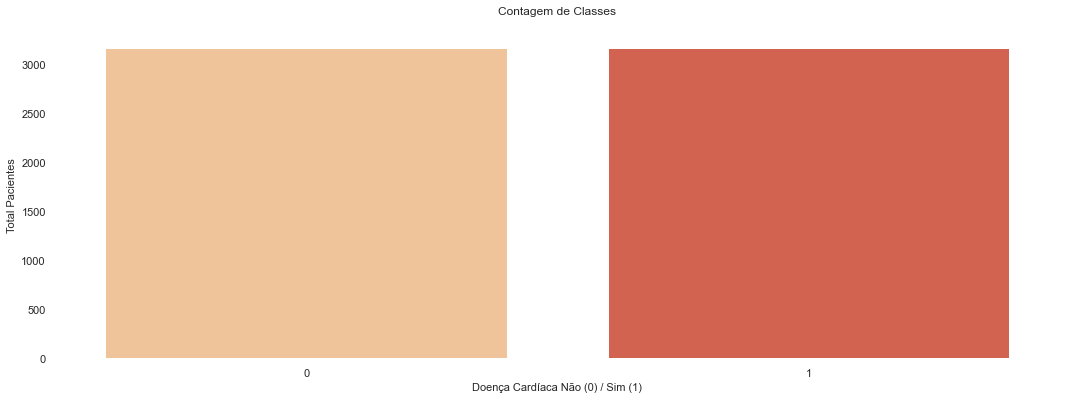

In [29]:
# Plot
sns.countplot(y_res, palette = "OrRd")
plt.box(False)
plt.xlabel('Doença Cardíaca Não (0) / Sim (1)', fontsize = 11)
plt.ylabel('Total Pacientes', fontsize = 11)
plt.title('Contagem de Classes\n')
plt.show()

In [30]:
# Confere o shape
X_res.shape, y_res.shape

((6350, 14), (6350,))

# Parte 4. Construindo o Modelo de Regressão Logística

LR: 0.613386 (0.024952)
RF: 0.884567 (0.030317)
LDA: 0.615118 (0.026783)
KNN: 0.756693 (0.102341)
CART: 0.799685 (0.065983)
SVM: 0.639528 (0.027936)


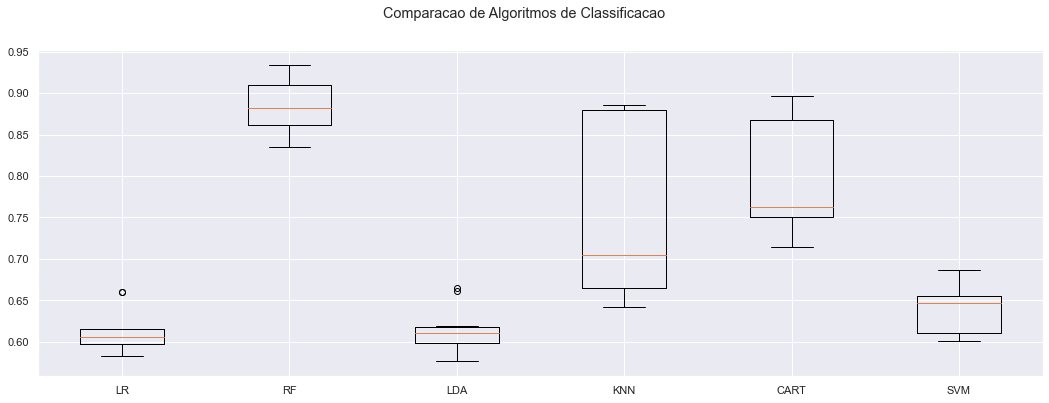

In [33]:
# Criacao dos modelos de Classificacao

# Import dos módulos
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

warnings.filterwarnings("ignore")

# Separando o array em componentes de input e output (dados com oversampling)
X = X_res
Y = y_res

# Aplicando a mesma escala nos dados
X = MinMaxScaler().fit_transform(X)

# Definindo os valores para o número de folds
num_folds = 10
seed = 0

# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('RF', RandomForestClassifier()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, random_state = seed)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparacao de Algoritmos de Classificacao')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

# Parte 5. Otimizando Performance com Métodos Ensemble

In [40]:
# Import dos módulos
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Separando o array em componentes de input e output (dados com oversampling)
X = X_res
Y = y_res

# Aplicando a mesma escala nos dados
X = MinMaxScaler().fit_transform(X)

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.3
seed = 0

# Criando o dataset de treino e de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criando o modelo
modeloXGB = XGBClassifier()

# Treinando o modelo
modeloXGB.fit(X_treino, y_treino)

# Fazendo previsões
y_pred = modeloXGB.predict(X_teste)
previsoes = [round(value) for value in y_pred]

# Avaliando as previsões
accuracyXGB = accuracy_score(y_teste, previsoes)
print("Acurácia: %.2f%%" % (accuracyXGB * 100.0))

resultados.append(accuracyXGB)
nomes.append('XGB')

Acurácia: 80.21%


In [41]:
resultados.append(accuracyXGB)
nomes.append('XGB')

Fitting 4 folds for each of 24 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:    2.7s finished


{'boosting_type': 'gbdt', 'colsample_bytree': 0.64, 'learning_rate': 0.07, 'n_estimators': 16, 'num_leaves': 27, 'objective': 'binary', 'random_state': 501, 'subsample': 0.7}
0.7525292772082964
Fitting with params: 
{'boosting_type': 'gbdt', 'max_depth': -1, 'objective': 'binary', 'nthread': 5, 'num_leaves': 27, 'learning_rate': 0.07, 'max_bin': 512, 'subsample_for_bin': 200, 'subsample': 0.7, 'subsample_freq': 1, 'colsample_bytree': 0.64, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'min_split_gain': 0.5, 'min_child_weight': 1, 'min_child_samples': 5, 'scale_pos_weight': 1, 'num_class': 1, 'metric': 'binary_error'}
Overall accuracy of Light GBM model: 0.8330708661417323


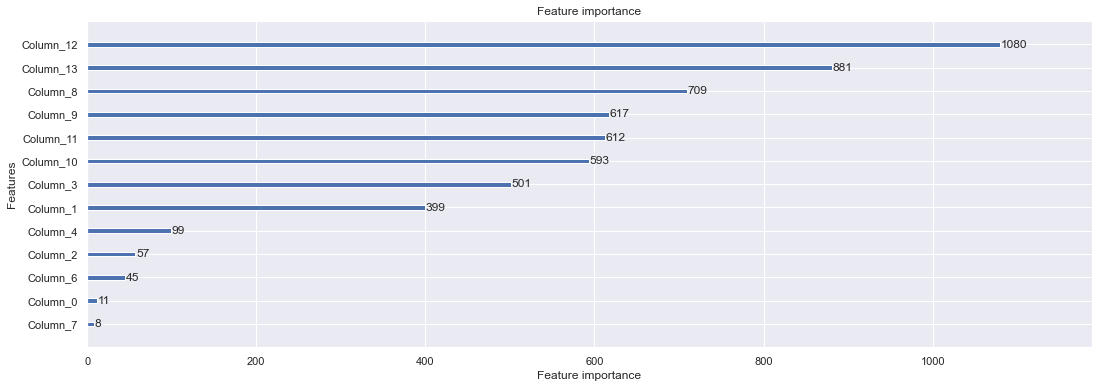

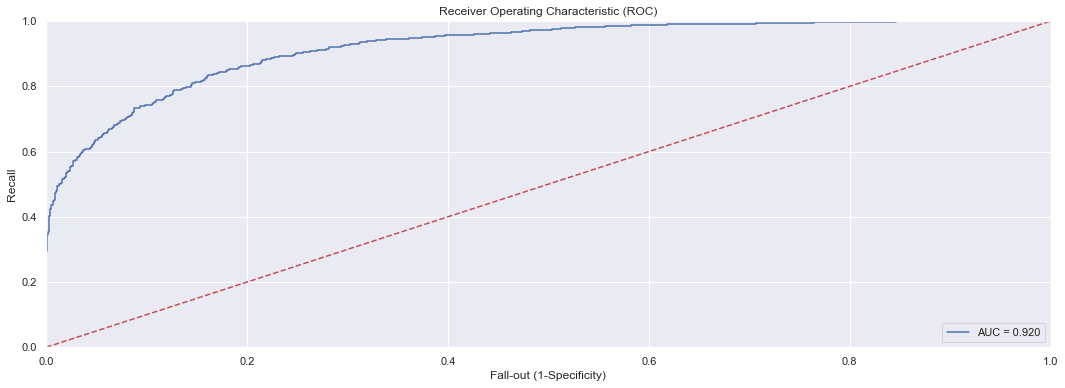

AUC score: 0.9195832175971854


<Figure size 1296x432 with 0 Axes>

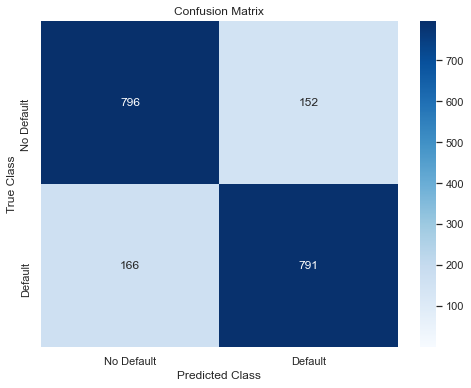

In [39]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

# Separando o array em componentes de input e output (dados com oversampling)
X = X_res
Y = y_res

# Aplicando a mesma escala nos dados
X = MinMaxScaler().fit_transform(X)

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.3
seed = 0

# Criando o dataset de treino e de teste
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = teste_size, random_state = seed)

#------------------------Build LightGBM Model-----------------------
train_data=lgb.Dataset(train_x, label=train_y)

#Select Hyper-Parameters
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 5,
          'num_leaves': 64,
          'learning_rate': 0.07,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 1.2,
          'reg_lambda': 1.2,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'
          }

# Create parameters to search
gridParams = {
    'learning_rate': [0.07],
    'n_estimators': [8,16],
    'num_leaves': [20, 24, 27],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.64, 0.65],
    'subsample' : [0.7,0.75],
    #'reg_alpha' : [1, 1.2],
    #'reg_lambda' : [ 1.2, 1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 5, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

# View the default model params:
mdl.get_params().keys()

# Create the grid
grid = GridSearchCV(mdl, gridParams, verbose=2, cv=4, n_jobs=-1)

# Run the grid
grid.fit(train_x, train_y)

# Print the best parameters found
print(grid.best_params_)
print(grid.best_score_)

# Using parameters already set above, replace in the best from the grid search
params['colsample_bytree'] = grid.best_params_['colsample_bytree']
params['learning_rate'] = grid.best_params_['learning_rate']
# params['max_bin'] = grid.best_params_['max_bin']
params['num_leaves'] = grid.best_params_['num_leaves']
#params['reg_alpha'] = grid.best_params_['reg_alpha']
#params['reg_lambda'] = grid.best_params_['reg_lambda']
params['subsample'] = grid.best_params_['subsample']
# params['subsample_for_bin'] = grid.best_params_['subsample_for_bin']

print('Fitting with params: ')
print(params)

#Train model on selected parameters and number of iterations
lgbm = lgb.train(params,
                 train_data,
                 280,
                 #early_stopping_rounds= 40,
                 verbose_eval= 4
                 )

#Predict on test set
predictions_lgbm_prob = lgbm.predict(test_x)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output

#--------------------------Print accuracy measures and variable importances----------------------
#Plot Variable Importances
lgb.plot_importance(lgbm, max_num_features=21, importance_type='split')

#Print accuracy
acc_lgbm = accuracy_score(test_y,predictions_lgbm_01)
print('Overall accuracy of Light GBM model:', acc_lgbm)

#Print Area Under Curve
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(test_y, predictions_lgbm_prob)
roc_auc = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()

print('AUC score:', roc_auc)

#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(test_y, predictions_lgbm_01)
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [42]:
resultados.append(roc_auc)
nomes.append('LGB')

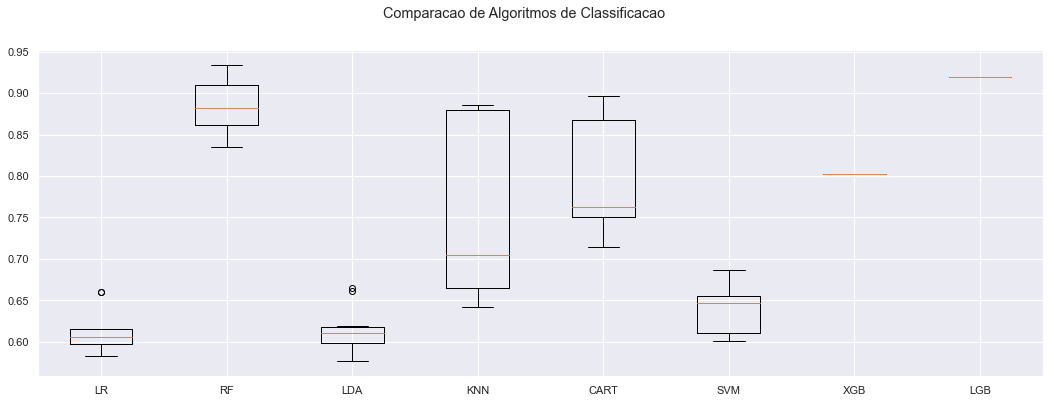

In [43]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparacao de Algoritmos de Classificacao')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

### Interpretação dos Resultados: Odds Ratio, Intervalos de Confiança e Valores-p

- Extrair os parâmetros e mostrar em formato de tabela

- Calcular o exponencial de cada um dos coeficientes para gerar os índices de chances (Odds Ratio). 

- Isso mostra como um aumento ou diminuição de 1 unidade em uma variável afeta as chances de desenvolver a doença. 

# Fim